In [1]:
# Import the primary data analysis libraries
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
from scipy import signal

In [100]:
import os

log_path = 'Logs'
files_in_log_path = [f for f in os.listdir(log_path) if os.path.isfile(os.path.join(log_path, f))]

print("The following files are available to load in the '{}' dir: ".format(log_path))
for filename in files_in_log_path:
    print(filename)

The following files are available to load in the 'Logs' dir: 
received_data_2024-02-08_130927.csv
received_data_2024-02-08_141049.csv
received_data_2024-02-08_122804.csv
received_data_2024-02-08_124848.csv
received_data_2024-02-08_141037.csv
received_data_2024-02-08_130654.csv
received_data_2024-02-08_125311.csv
received_data_2024-02-08_132136.csv
received_data_2024-02-08_135932.csv
received_data_2024-02-08_142749.csv
received_data_2024-02-08_130243.csv
received_data_2024-02-08_122451.csv


In [101]:
log_filename = "received_data_2024-02-08_142749.csv"
log_filename_with_path = os.path.join(log_path, log_filename)

raw_data = np.loadtxt(log_filename_with_path, delimiter=',', unpack=True, skiprows=1)
(accel_time, accel_mag, stepCount, totalStepCount) = raw_data

print("Read in {} samples from {}".format(len(accel_mag), log_filename))

Read in 423 samples from received_data_2024-02-08_142749.csv


In [102]:
# Print some stats about the loaded data
import math

sample_time_in_ms = accel_time[-1] - accel_time[0]
sample_time_in_s = sample_time_in_ms / 1000.0
num_samples = accel_time.size
print("Num samples: ", num_samples)
print("First timestamp: {} ms".format(int(accel_time[0])))
print("Last timestamp: {} ms".format(int(accel_time[-1])))

# Dive into timestamps a bit to analyze sampling rate over time
map_sec_to_sample_count = dict()
for timestamp_ms in accel_time:
    sec_floor = math.floor(timestamp_ms / 1000.0)
    if sec_floor not in map_sec_to_sample_count:
        map_sec_to_sample_count[sec_floor] = 0
    map_sec_to_sample_count[sec_floor] = map_sec_to_sample_count[sec_floor] + 1

print("Length (raw diff): {} secs".format(sample_time_in_s))
print("Length (rounded ceiling): {} secs".format(len(map_sec_to_sample_count)))
total_time = len(map_sec_to_sample_count)

counts = list(map_sec_to_sample_count.values())
np_counts = np.array(counts)
sampling_rate_imprecise = accel_time.size / sample_time_in_s
print("Coarse sampling rate: {:.2f} samples/sec".format(sampling_rate_imprecise))
sampling_rate = np.average(np_counts)
print("More precise sampling rate calc: {:.2f} samples/sec (SD={:.2f} samples/sec)".
      format(sampling_rate, np.std(np_counts)))

print()
print("**Accel stats**")
print("Avg mag: {:.2f} (SD={:.2f})".format(np.mean(accel_mag), np.std(accel_mag)))

# What other descriptive stats may be useful to better understand and assess your signal?

Num samples:  423
First timestamp: 3195 ms
Last timestamp: 47099 ms
Length (raw diff): 43.904 secs
Length (rounded ceiling): 40 secs
Coarse sampling rate: 9.63 samples/sec
More precise sampling rate calc: 10.57 samples/sec (SD=3.17 samples/sec)

**Accel stats**
Avg mag: 11.59 (SD=2.40)


In [103]:
# We can also use pandas to analyze our data. I don't use Pandas that much (I should use it more!)
# but it's incredibly popular in data science. It definitely simplifies things like computing
# descriptive stats.
import pandas as pd

# Make a dataframe (the key data object in pandas)
# We could also use Pandas to load and parse our CSV directly
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#getting-data-in-out
df = pd.DataFrame(list(zip(accel_time, accel_mag, stepCount, totalStepCount)), 
               columns =["Timestamp", "Mag", "StepCount", "TotalStepCount"]) 

df.describe()

# We won't be using Pandas anymore below but feel free to explore it more on your own!

,Timestamp,Mag,StepCount,TotalStepCount
count,423.000000,423.000000,423.000000,423.000000
mean,23370.494090,11.589362,0.061466,12.813239
std,12363.242538,2.406216,0.301662,8.355298
min,3195.000000,2.180000,0.000000,0.000000
25%,12418.500000,9.700000,0.000000,7.000000
50%,24163.000000,10.320000,0.000000,13.000000
75%,32333.500000,13.825000,0.000000,22.000000
max,47099.000000,16.870000,2.000000,26.000000


10
423
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420]


Text(0.5, 1.0, 'Accelerometer Magnitude')

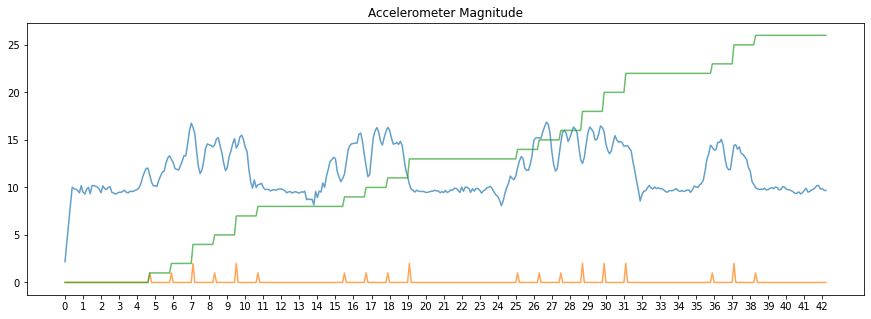

In [104]:
# Now, let's plot the raw x, y, z, and magnitude values
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_x, alpha=0.7, label="X")
# axes.plot(accel_y, alpha=0.7, label="Y")
# axes.plot(accel_z, alpha=0.7, label="Z")
axes.plot(accel_mag, alpha=0.7, label="Mag")
axes.plot(stepCount, alpha=0.7, label="StepCount")
axes.plot(totalStepCount, alpha=0.7, label="TotalSteps")

sample_duration = num_samples // total_time
print(sample_duration)
print(num_samples)
# time_values = np.arange(0, total_time, sample_duration)

# Generate x-axis ticks
x_ticks = np.arange(0, num_samples, sample_duration)

print(x_ticks)
plt.xticks(x_ticks, [f"{val//sample_duration}" for val in x_ticks])  # Format tick labels as seconds with one decimal place

# set the title and show the legend
axes.set_title("Accelerometer Magnitude")

# What do you observe?

In [105]:
accel_mag

array([ 2.18,  4.18,  6.07,  8.14, 10.02,  9.86,  9.8 ,  9.68,  9.43,
       10.18,  9.51,  9.3 ,  9.81, 10.02,  9.33, 10.19, 10.2 , 10.11,
       10.03,  9.81,  9.44, 10.16,  9.88,  9.77, 10.01, 10.06,  9.48,
        9.41,  9.29,  9.39,  9.49,  9.48,  9.58,  9.71,  9.49,  9.42,
        9.59,  9.57,  9.6 ,  9.7 ,  9.77,  9.94, 10.35, 11.05, 11.57,
       11.99, 12.03, 11.28, 10.55, 10.16, 10.18, 10.1 , 10.75, 11.19,
       11.6 , 11.7 , 12.54, 13.09, 13.33, 12.96, 12.61, 11.98, 11.9 ,
       11.83, 12.27, 12.76, 13.34, 13.33, 14.55, 15.92, 16.76, 16.32,
       15.65, 13.8 , 12.16, 11.46, 11.87, 12.87, 14.14, 14.58, 14.48,
       14.42, 14.26, 14.49, 15.1 , 15.23, 14.39, 13.65, 12.57, 11.77,
       12.07, 13.21, 13.8 , 14.58, 15.14, 14.15, 14.49, 15.31, 15.5 ,
       15.03, 14.21, 13.75, 11.88, 10.61,  9.91, 10.79,  9.99, 10.28,
       10.33, 10.43,  9.98,  9.77,  9.8 ,  9.77,  9.63,  9.73,  9.77,
        9.68,  9.81,  9.84,  9.85,  9.74,  9.64,  9.43,  9.54,  9.55,
        9.41,  9.51,

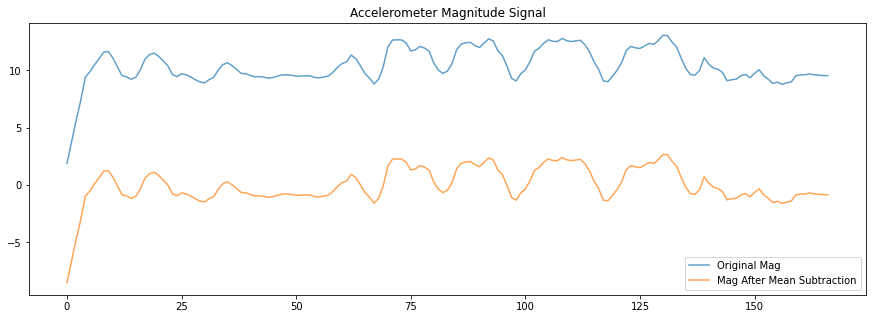

In [7]:
# Apply some basic processing. Here, we'll subtract out the mean so that the
# average of the signal is zero (this is helpful to, for example, count zero crossings)

mag_after_mean_subtraction = accel_mag - np.average(accel_mag)

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_after_mean_subtraction, alpha=0.7, label="Mag After Mean Subtraction")

# set the title and show the legend
axes.set_title("Accelerometer Magnitude Signal")
axes.legend()

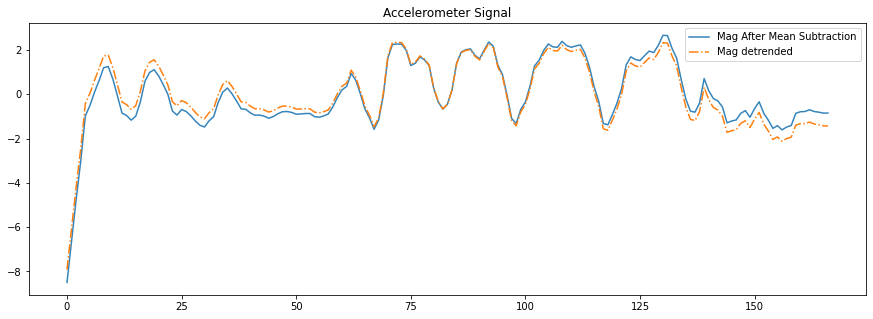

In [8]:
# We can also use scipy's built in detrend algorithm, which is the result
# of a linear least-squares fit to the data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html
mag_detrended = sp.signal.detrend(accel_mag) 

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_after_mean_subtraction, alpha=0.9, label="Mag After Mean Subtraction")
axes.plot(mag_detrended, alpha=1, linestyle="-.", label="Mag detrended")

# set the title and show the legend
axes.set_title("Accelerometer Signal")
axes.legend()

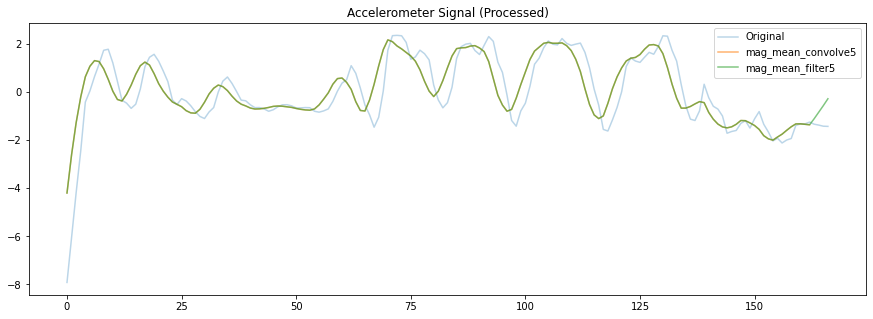

In [9]:
# Now, let's play around with various smoothing methods
# Here are different mean smoothing filters
# Note that the filter window size should really be a function of your sampling rate

def mean_filter(signal, N):
    filter_signal = np.zeros((len(signal),))
    for ctr in range(len(signal)):
         filter_signal[ctr] = np.sum(signal[ctr:(ctr+N)])
    return filter_signal/N


filter_window_size = 5

# Convolve using a mean filter
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve
# or just use our own mean_filter code
mag_mean_convolve5 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')


mag_mean_filter5 = mean_filter(mag_detrended, filter_window_size)

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.3, label="Original")
axes.plot(mag_mean_convolve5, alpha=0.6, label="mag_mean_convolve5")
axes.plot(mag_mean_filter5, alpha=0.6, label="mag_mean_filter5")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Processed)")
axes.legend()

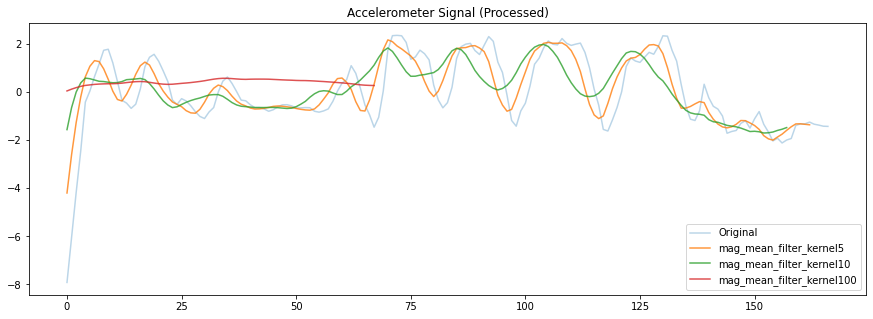

In [10]:
# Effect of various window sizes on mean filter

filter_window_size = 5

# Convolve using a mean filter
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve
# or just use our own mean_filter code
mag_mean_filter_kernel5 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

filter_window_size = 10
mag_mean_filter_kernel10 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

filter_window_size = 100
mag_mean_filter_kernel100 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.3, label="Original")
axes.plot(mag_mean_filter_kernel5, alpha=0.8, label="mag_mean_filter_kernel5")
axes.plot(mag_mean_filter_kernel10, alpha=0.8, label="mag_mean_filter_kernel10")
axes.plot(mag_mean_filter_kernel100, alpha=0.8, label="mag_mean_filter_kernel100")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Processed)")
axes.legend()

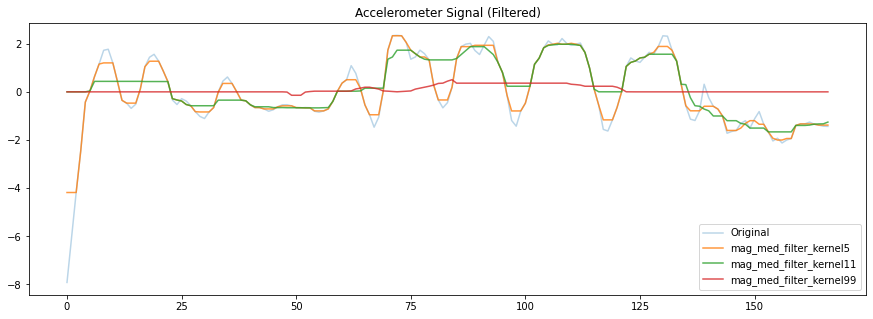

In [11]:
# median filters are easy to implement but fairly destructive
filter_window_size = 5 # should be odd
mag_med_filter_kernel5 = sp.signal.medfilt(mag_detrended, filter_window_size)

filter_window_size = 11
mag_med_filter_kernel11 = sp.signal.medfilt(mag_detrended, filter_window_size)

filter_window_size = 99
mag_med_filter_kernel99 = sp.signal.medfilt(mag_detrended, filter_window_size)

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.3, label="Original")
axes.plot(mag_med_filter_kernel5, alpha=0.8, label="mag_med_filter_kernel5")
axes.plot(mag_med_filter_kernel11, alpha=0.8, label="mag_med_filter_kernel11")
axes.plot(mag_med_filter_kernel99, alpha=0.8, label="mag_med_filter_kernel99")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Filtered)")
axes.legend()

Sampling rate: 11.93 Hz
Maximum detectable frequency in our signal is: 5.96 Hz (due to Nyquist theorem)


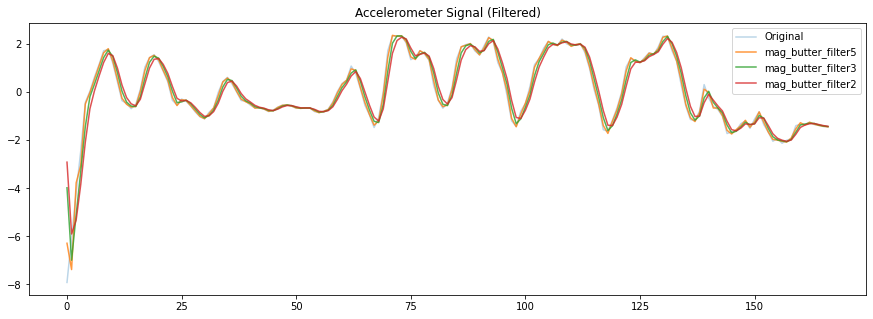

In [12]:
# The Mladenov paper uses a Butterworth filter but a mean filter works well for this problem as well
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# There are many other filters available in scipy

print("Sampling rate: {:0.2f} Hz".format(sampling_rate))
print("Maximum detectable frequency in our signal is: {:.2f} Hz (due to Nyquist theorem)".format(sampling_rate/2.0))

filter_order = 1
low_pass_cutoff_freq = 5;
nyquist_freq = 0.5 * sampling_rate
sos = signal.butter(filter_order, low_pass_cutoff_freq, 'lowpass', fs=sampling_rate, output='sos')
mag_butter_filter5 = signal.sosfilt(sos, mag_detrended)

low_pass_cutoff_freq = 3;
sos = signal.butter(filter_order, low_pass_cutoff_freq, 'lowpass', fs=sampling_rate, output='sos')
mag_butter_filter3 = signal.sosfilt(sos, mag_detrended)

low_pass_cutoff_freq = 2;
sos = signal.butter(filter_order, low_pass_cutoff_freq, 'lowpass', fs=sampling_rate, output='sos')
mag_butter_filter2 = signal.sosfilt(sos, mag_detrended)

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.3, label="Original")
axes.plot(mag_butter_filter5, alpha=0.8, label="mag_butter_filter5")
axes.plot(mag_butter_filter3, alpha=0.8, label="mag_butter_filter3")
axes.plot(mag_butter_filter2, alpha=0.8, label="mag_butter_filter2")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Filtered)")
axes.legend()